# Exploratory Data Analytics for Hotel Data

In [135]:
# First Reading all data sets and dispalying the first few rows
import pandas as pd

date_df = pd.read_csv('datasets/dim_date.csv')
hotel_df = pd.read_csv('datasets/dim_hotels.csv')
rooms_df = pd.read_csv('datasets/dim_rooms.csv')
aggregated_bookings_df = pd.read_csv('datasets/fact_aggregated_bookings.csv')
bookings_df = pd.read_csv('datasets/fact_bookings.csv')

print("Date DataFrame:")
print(date_df.head())
print("\nHotel DataFrame:")
print(hotel_df.head())
print("\nRooms DataFrame:")
print(rooms_df.head())
print("\nAggregated Bookings DataFrame:")
print(aggregated_bookings_df.head())
print("\nBookings DataFrame:")
print(bookings_df.head())

Date DataFrame:
        date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday

Hotel DataFrame:
   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi

Rooms DataFrame:
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential

Aggregated Bookings DataFrame:
   property_id check_in_date room_category  successful_bookings  capacity
0        16559      1-May-22           RT1                   25      30.0
1        19562      1-May-22           RT1                   28      30.0
2        19563      1-May-22           RT1          

## Quick observations based on the first few rows - 
1. Date DataFrame

    a. Date is in DD-MMM-YY format and there are separate columns for month, year and week no. which might be useful for analysis

    b. There is a spelling mistake in the day_type column for weekday (Instead of weekday it is weekeday)

2. Hotel DataFrame

    a. Every property has a unique id

3. Rooms DataFrame

    a. There are only 4 types of rooms with defined ids

4. Aggregated Bookings DataFrame

    a. It contains total successful bookings for each property for a particular date and room category along with total capacity.

    b. check_in_date column has date in DD-MMM-YY format but in Date table DD was displaying as 01 but in this table it is displaying as 1.

5. Bookings DataFrame

    a. It contains unique booking ids with property id, booking_date, check_in_date and checkout_date for each booking.

    b. booking_date column has date in DD-MM-YY format, check_in_date and checkout_date columns have date in DD/MM/YYYY format.

    c. no_guests column has -ve values which might be an error in the data.

    d. ratings_given column has some NaN values which is possible i think because not all users provide ratings.

    e. booking_status column has cancelled as status as well which means this table has both successful and cancelled bookings.

    f. for some records there is a huge gap between revenue generated and revenue realized which could be an outlier or error in the data.

In [136]:
# Running describe on all data sets to get summary statistics
print("\nDate DataFrame Description:")
print(date_df.describe(include='all'))
print("\nHotel DataFrame Description:")
print(hotel_df.describe(include='all'))
print("\nRooms DataFrame Description:")
print(rooms_df.describe(include='all'))
print("\nAggregated Bookings DataFrame Description:")
print(aggregated_bookings_df.describe(include='all'))
print("\nBookings DataFrame Description:")
print(bookings_df.describe(include='all'))


Date DataFrame Description:
             date  mmm yy week no  day_type
count          92      92      92        92
unique         92       3      14         2
top     01-May-22  May 22    W 19  weekeday
freq            1      31       7        65

Hotel DataFrame Description:
         property_id property_name category    city
count      25.000000            25       25      25
unique           NaN             7        2       4
top              NaN  Atliq Grands   Luxury  Mumbai
freq             NaN             4       16       8
mean    18040.640000           NaN      NaN     NaN
std      1122.436371           NaN      NaN     NaN
min     16558.000000           NaN      NaN     NaN
25%     17558.000000           NaN      NaN     NaN
50%     17564.000000           NaN      NaN     NaN
75%     18563.000000           NaN      NaN     NaN
max     19563.000000           NaN      NaN     NaN

Rooms DataFrame Description:
       room_id room_class
count        4          4
unique       4 

## Quick observations based on the summary statistics -
1. Date DataFrame

    a. There are 92 unique records with data for 3 years.

2. Hotel DataFrame

    a. There is data for 7 properties with 2 categories and 4 cities.

3. Rooms DataFrame

    a. There are 4 types of rooms as well.

4. Aggregated Bookings DataFrame

    a. Max successful booking on a day is 123 for property id 19563, which does not make sense since max capacity is 50. We will have to check this data.

5. Bookings DataFrame

    a. Minimum no_guests is -17 which is not possible. We will have to check this data.
    b. There are 7 unique booking platforms.
    c. There are 3 unique booking statuses.

## Checking dataset shapes and running value counts and plots to have a feel of the data

In [137]:
aggregated_bookings_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


### Checking distribution for room_category

In [138]:
aggregated_bookings_df['room_category'].value_counts()

room_category
RT1    2300
RT2    2300
RT3    2300
RT4    2300
Name: count, dtype: int64

### Checking successful bookings by property_id in descending order

In [139]:
aggregated_bookings_df.groupby('property_id')['successful_bookings'].sum().sort_values(ascending=False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

### Checking records where successful_bookings > capacity

In [140]:
aggregated_bookings_df[aggregated_bookings_df['successful_bookings'] > aggregated_bookings_df['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


### Displaying records with max capacity

In [141]:
aggregated_bookings_df[aggregated_bookings_df['capacity'] == aggregated_bookings_df['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


### Displaying shapes for all data sets

In [142]:
aggregated_bookings_df.shape, bookings_df.shape, date_df.shape, hotel_df.shape, rooms_df.shape

((9200, 5), (134590, 12), (92, 4), (25, 4), (4, 2))

In [143]:
bookings_df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


### Checking records with no_guests < 0

In [144]:
bookings_df[bookings_df['no_guests'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


### Plotting bar chart for room_category distribution

<Axes: xlabel='room_category'>

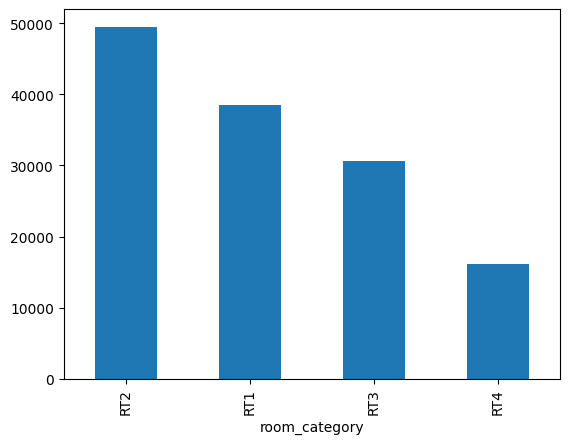

In [145]:
bookings_df['room_category'].value_counts().plot(kind='bar')

### Plotting bar chart for booking_platform distribution

<Axes: xlabel='booking_platform'>

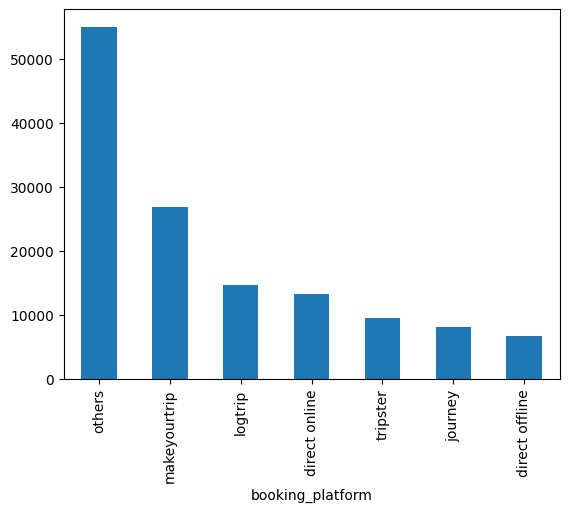

In [146]:
bookings_df['booking_platform'].value_counts().plot(kind='bar')

### Plotting bar chart for booking_status distribution

<Axes: xlabel='booking_status'>

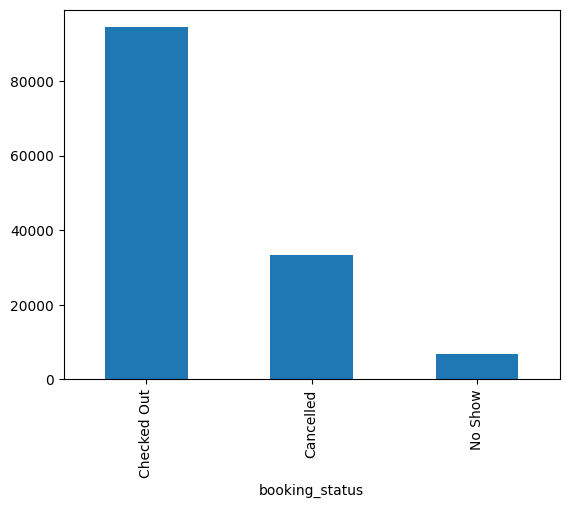

In [147]:
bookings_df['booking_status'].value_counts().plot(kind='bar')

In [148]:
hotel_df.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


### Plotting bar chart for hotel category distribution

<Axes: xlabel='category'>

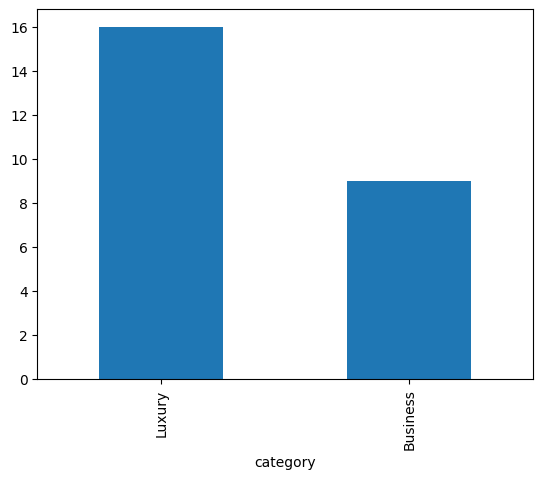

In [149]:
hotel_df['category'].value_counts().plot(kind='bar')

### Plotting bar chart for hotel city distribution

<Axes: xlabel='city'>

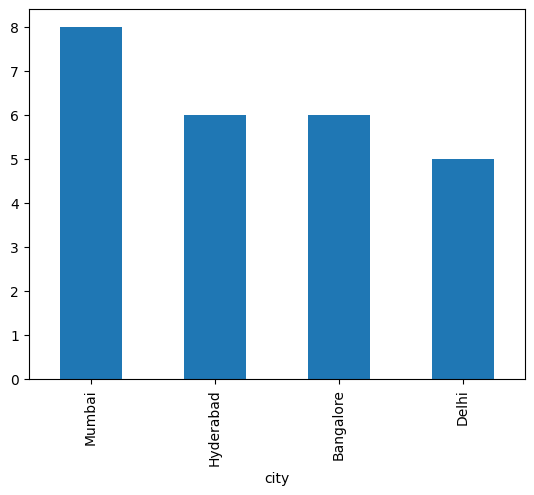

In [150]:
hotel_df['city'].value_counts().plot(kind='bar')

In [151]:
rooms_df.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


## Data Cleaning

### Checking records with no_guests < 0

In [152]:
bookings_df[bookings_df['no_guests'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [153]:
bookings_df.shape

(134590, 12)

### Removing records with no_guests < 0

In [154]:
bookings_df = bookings_df[bookings_df['no_guests'] >= 0]
bookings_df.shape

(134578, 12)

### Checking outliers for revenue_generated

In [155]:
bookings_df['revenue_generated'].min(), bookings_df['revenue_generated'].max()

(np.int64(6500), np.int64(28560000))

In [156]:
bookings_df['revenue_generated'].mean(), bookings_df['revenue_generated'].median()

(np.float64(15378.036937686695), np.float64(13500.0))

In [157]:
# Using z-score method to identify outliers
highest_revenue = bookings_df['revenue_generated'].mean() + 3 * bookings_df['revenue_generated'].std()
lowest_revenue = bookings_df['revenue_generated'].mean() - 3 * bookings_df['revenue_generated'].std()
highest_revenue, lowest_revenue

(np.float64(294498.50173207896), np.float64(-263742.4278567056))

In [158]:
bookings_df[bookings_df['revenue_generated'] > highest_revenue]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [159]:
bookings_df[bookings_df['revenue_generated'] < lowest_revenue]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [160]:
bookings_df[bookings_df['revenue_generated'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [161]:
# So the only outliers are revenue_generated > highest_revenue which is 3 standard deviations above the mean.
# We can choose to remove these outliers or keep them based on the analysis requirements. Here we are choosing to remove them.
bookings_df = bookings_df[bookings_df['revenue_generated'] <= highest_revenue]
bookings_df.shape

(134573, 12)

In [162]:
bookings_df['revenue_generated'].describe()

count    134573.000000
mean      14915.959776
std        6452.676164
min        6500.000000
25%        9900.000000
50%       13500.000000
75%       18000.000000
max       45220.000000
Name: revenue_generated, dtype: float64

In [163]:
# Now similarly checking outlier for revenue_realized
bookings_df['revenue_realized'].min(), bookings_df['revenue_realized'].max()

(np.int64(2600), np.int64(45220))

In [164]:
bookings_df['revenue_realized'].mean(), bookings_df['revenue_realized'].median()

(np.float64(12695.983585117372), np.float64(11700.0))

In [165]:
highest_revenue_realized = bookings_df['revenue_realized'].mean() + 3 * bookings_df['revenue_realized'].std()
lowest_revenue_realized = bookings_df['revenue_realized'].mean() - 3 * bookings_df['revenue_realized'].std()
highest_revenue_realized, lowest_revenue_realized

(np.float64(33479.358661845814), np.float64(-8087.391491611072))

In [166]:
bookings_df[bookings_df['revenue_realized'] < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [167]:
bookings_df[bookings_df['revenue_realized'] > highest_revenue_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [168]:
# Seems there are no outliers in revenue_realized column

### Checking for null values

In [169]:
bookings_df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

### This is too much data to clean. We will use this data as it is. Also ratings are normal to be missing.

In [170]:
# Checking for null values in aggregated_bookings_df
aggregated_bookings_df.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [171]:
# There are only 3 records with null values in capacity column which we can replace with mean or median. 
# Lets first check these records and also check the mean and median of capacity column
aggregated_bookings_df[aggregated_bookings_df['capacity'].isnull()], aggregated_bookings_df['capacity'].mean(), aggregated_bookings_df['capacity'].median()

(    property_id check_in_date room_category  successful_bookings  capacity
 8         17561      1-May-22           RT1                   22       NaN
 14        17562      1-May-22           RT1                   12       NaN,
 np.float64(25.280495759947815),
 np.float64(25.0))

In [172]:
# Since capacity has to be more than successful_bookings, and our mean and median both are more than it, we can replace null value with any of them. Here we are replacing with median because its a whole number and capacity has to be a whole number.
aggregated_bookings_df['capacity'].fillna(aggregated_bookings_df['capacity'].median(), inplace=True)

C:\Users\JasvirPC\AppData\Local\Temp\ipykernel_12944\3907165276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_bookings_df['capacity'].fillna(aggregated_bookings_df['capacity'].median(), inplace=True)


In [173]:
# Got warning - The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

# So lets do it as suggested in example

aggregated_bookings_df['capacity'] = aggregated_bookings_df['capacity'].fillna(aggregated_bookings_df['capacity'].median())
aggregated_bookings_df.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [174]:
# Lets check those 2 records again to confirm null values are replaced. With index as 8 and 14
aggregated_bookings_df.loc[[8, 14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [175]:
# Initially we observed that aggregated_bookings_df has some records where successful_bookings are more than capacity which is not possible. So we will remove those records.
aggregated_bookings_df = aggregated_bookings_df[aggregated_bookings_df['successful_bookings'] <= aggregated_bookings_df['capacity']]
aggregated_bookings_df.shape

(9194, 5)

## Data Cleaning is done. Now we can proceed with Data Transformation.

In [176]:
# We will create a new column 'occupancy_percentage' to see what percentage of capacity is utilized by successful bookings. This is calculated as (successful_bookings / capacity) * 100
# Its a good metric in hotel industry to see how well the hotel is performing in terms of bookings.
aggregated_bookings_df['occupancy_percentage'] = (aggregated_bookings_df['successful_bookings'] / aggregated_bookings_df['capacity']) * 100

In [177]:
aggregated_bookings_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000


In [178]:
aggregated_bookings_df['occupancy_percentage'] = aggregated_bookings_df['occupancy_percentage'].round(2)
aggregated_bookings_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [179]:
aggregated_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           9194 non-null   int64  
 1   check_in_date         9194 non-null   object 
 2   room_category         9194 non-null   object 
 3   successful_bookings   9194 non-null   int64  
 4   capacity              9194 non-null   float64
 5   occupancy_percentage  9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


## Insights Generation

**1. What is an average occupancy rate in each of the room categories?**

In [180]:
aggregated_bookings_df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [181]:
aggregated_bookings_df.groupby('room_category')['occupancy_percentage'].mean().sort_values(ascending=False)

room_category
RT4    59.277925
RT3    58.028213
RT2    58.009756
RT1    57.889643
Name: occupancy_percentage, dtype: float64

In [182]:
# If we have to display Room Class instead of RT1, RT2.
df = pd.merge(aggregated_bookings_df, rooms_df, left_on='room_category', right_on='room_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [183]:
df.drop('room_id', axis=1, inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [184]:
df.groupby('room_class')['occupancy_percentage'].mean().sort_values(ascending=False)

room_class
Presidential    59.277925
Premium         58.028213
Elite           58.009756
Standard        57.889643
Name: occupancy_percentage, dtype: float64

**2. Print average occupancy rate per city**

In [185]:
df = pd.merge(df, hotel_df, on='property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai


In [186]:
df.groupby('city')['occupancy_percentage'].mean().sort_values(ascending=False)

city
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Bangalore    56.332376
Name: occupancy_percentage, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [187]:
df = pd.merge(df, date_df, left_on='check_in_date', right_on='date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [188]:
df.groupby('day_type')['occupancy_percentage'].mean().sort_values(ascending=False)

day_type
weekend     72.343625
weekeday    50.883140
Name: occupancy_percentage, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [189]:
df_jun = df[df["mmm yy"].str.contains("Jun")]
df_jun.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [190]:
df_jun.groupby('city')['occupancy_percentage'].mean().sort_values(ascending=False)

city
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Bangalore    56.436143
Name: occupancy_percentage, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [191]:
df_aug = pd.read_csv('datasets/new_data_august.csv')
df_aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [192]:
df_aug.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [193]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occupancy_percentage', 'room_class', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [194]:
df.shape, df_aug.shape

((6497, 14), (7, 13))

In [ ]:
final_df = pd.concat([df, df_aug], ignore_index=True, axis=0)
final_df.shape

(6504, 15)

**6. Print revenue realized per city**

In [208]:
bookings_df_all = pd.merge(bookings_df, hotel_df, on='property_id')
bookings_df_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [209]:
bookings_df_all.groupby('city')['revenue_realized'].sum().sort_values(ascending=False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [201]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [202]:
date_df["date"] = pd.to_datetime(date_df["date"])
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


C:\Users\JasvirPC\AppData\Local\Temp\ipykernel_12944\370565826.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_df["date"] = pd.to_datetime(date_df["date"])


In [211]:
bookings_df_all["check_in_date"] = pd.to_datetime(bookings_df_all["check_in_date"], format='mixed', dayfirst=True)
bookings_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [212]:
date_df.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [213]:
bookings_df_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [214]:
bookings_df_all = pd.merge(bookings_df_all, date_df, left_on='check_in_date', right_on='date')
bookings_df_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [216]:
bookings_df_all.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

**Print revenue realized per hotel type**

In [218]:
bookings_df_all.groupby('property_name')['revenue_realized'].sum().round(2).sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

**Print average rating per city**

In [219]:
bookings_df_all.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

**Print a pie chart of revenue realized per booking platform**

In [ ]:
bookings_df_all.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Revenue Realized per Booking Platform')

<Axes: title={'center': 'Revenue Realized per Booking Platform'}, ylabel='revenue_realized'>